Розпізнавання рукописних цифр за допомогою Keras

Завантаження необхідних бібліотек

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Dense, Dropout
from keras.layers import Dropout


Завантаження та візуалізація даних

11490434/11490434 [==============================] - 0s 0us/step


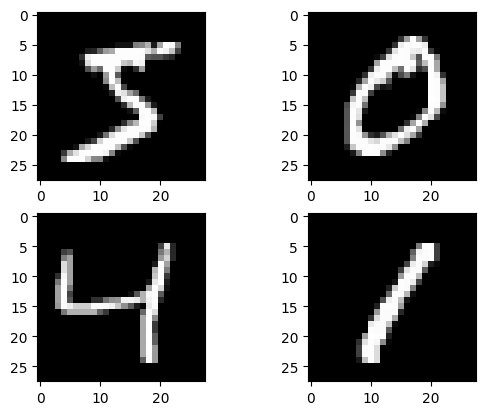

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Перетворення 2D-зображень у вектори

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

Нормалізація вхідних даних

In [ ]:
X_train /= 255
X_test /= 255


Однокласова енкодинг міток

In [ ]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
# Отримання кількості унікальних класів з y_train або y_test
num_classes = 2

Оголошення моделі

In [ ]:
def improved_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # 10 units for 10 classes, softmax for multiclass
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Побудова та навчання моделі

In [ ]:
model = improved_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Epoch 1/10
300/300 - 5s - loss: 0.3827 - accuracy: 0.8827 - val_loss: 0.1339 - val_accuracy: 0.9587 - 5s/epoch - 17ms/step
Epoch 2/10
300/300 - 5s - loss: 0.1645 - accuracy: 0.9499 - val_loss: 0.0957 - val_accuracy: 0.9704 - 5s/epoch - 15ms/step
Epoch 3/10
300/300 - 4s - loss: 0.1255 - accuracy: 0.9611 - val_loss: 0.0781 - val_accuracy: 0.9745 - 4s/epoch - 15ms/step
Epoch 4/10
300/300 - 5s - loss: 0.1094 - accuracy: 0.9669 - val_loss: 0.0791 - val_accuracy: 0.9759 - 5s/epoch - 15ms/step
Epoch 5/10
300/300 - 5s - loss: 0.0927 - accuracy: 0.9717 - val_loss: 0.0670 - val_accuracy: 0.9794 - 5s/epoch - 16ms/step
Epoch 6/10
300/300 - 4s - loss: 0.0827 - accuracy: 0.9745 - val_loss: 0.0670 - val_accuracy: 0.9791 - 4s/epoch - 14ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0763 - accuracy: 0.9755 - val_loss: 0.0648 - val_accuracy: 0.9804 - 4s/epoch - 14ms/step
Epoch 8/10
300/300 - 5s - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.0660 - val_accuracy: 0.9805 - 5s/epoch - 16ms/step
Epoch 9/10
300/3

 Оцінка точності моделі

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Помилка базової моделі: %.2f%%" % (100 - scores[1] * 100))

Помилка базової моделі: 1.72%


Збереження навченої моделі

In [ ]:
model.save("mnist_improved.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Відтворення та використання навченої моделі для розпізнавання рукописних цифр

In [ ]:
from keras.models import load_model

In [ ]:
# Завантаження збереженої моделі
loaded_model = load_model('mnist_improved.h5')

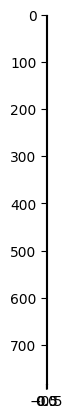

In [ ]:
# Вибір рандомного зображення для розпізнавання
n_rec = 126
plt.imshow(Image.fromarray(X_test[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
# Підготовка та використання моделі для розпізнавання обраного зображення
x = X_test[n_rec].reshape(1, 784)
prediction = loaded_model.predict(x)

1/1 [==============================] - 0s 63ms/step


In [ ]:
# Виведення результатів розпізнавання
print("Ймовірності класів:", prediction)
predicted_class = np.argmax(prediction)
print("Розпізнана цифра:", predicted_class)

Ймовірності класів: [[9.9990249e-01 1.2837401e-09 5.9057143e-06 3.2091120e-06 6.0729897e-09
  4.3102309e-06 7.0313381e-06 5.2301453e-07 1.7479747e-08 7.6550401e-05]]
Розпізнана цифра: 0


In [ ]:
# Виведення істинного класу для порівняння
true_class = np.argmax(y_test[n_rec])
print("Істинний клас:", true_class)

Істинний клас: 0


завантаження власного зображення та використання навченої моделі для розпізнавання

In [ ]:
files.upload()

Saving 1.jpg to 1.jpg


{'1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 86\n\xff\xdb\x00C\x00\x04\x03\x03\x04\x03\x03\x04\x04\x04\x04\x05\x05\x04\x05\x07\x0b\x07\x07\x06\x06\x07\x0e\n\n\x08\x0b\x10\x0e\x11\x11\x10\x0e\x10\x0f\x12\x14\x1a\x16\x12\x13\x18\x13\x0f\x10\x16\x1f\x17\x18\x1b\x1b\x1d\x1d\x1d\x11\x16 "\x1f\x1c"\x1a\x1c\x1d\x1c\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\r\x07\x07\r\x1c\x12\x10\x12\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\xff\xc0\x00\x11\x08\x05\xa0\n\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\

In [ ]:
# Шлях доображення
image_path = "1.jpg"
img = image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")

In [ ]:
# Конвертація зображення в масив numpy
img_array = image.img_to_array(img)

In [ ]:
# Зміна форми та нормалізація зображення
img_array = img_array.reshape((1, 28 * 28))
img_array = img_array.astype('float32') / 255.0

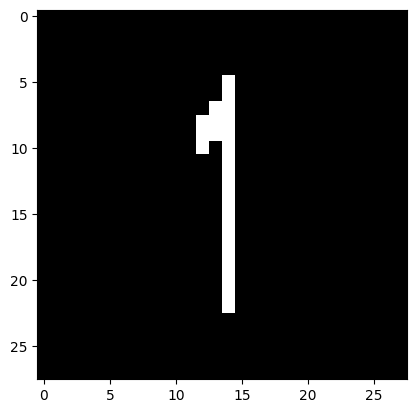

In [ ]:
# Відображення зображення
plt.imshow(img, cmap='gray')
plt.show()


In [ ]:
# Зроблення прогнозу за допомогою навченої моделі
prediction = model.predict(img_array)

1/1 [==============================] - 0s 68ms/step


In [ ]:
# Виведення прогнозу
print("Предсказана цифра:", np.argmax(prediction))

Предсказана цифра: 1
